# Enter your details in the cells below

**Type your fullname here**: **Dalvin Degbotse**

**Type your email here**: **dalvindegbotse@gmail.com**

#  Project
### Problem Statement

In the year 2013, a supermarket decided to draw insight from their data in order to make data driven decisions.
As a Data Analyst,you are presented with their 2013 daily sales records (sales_data.csv) and tasked to help them find answers to the questions below by analysing the data.

1. i. What is the average sales and profit per market? 

   ii.Plot a stacked bar chart showing the sales and profit per market.
   
   iii.Which market brings more sales on the average?

2. i. What are the best 10 performing products with regards to sales in 2013?

   ii.What are the least 10 performing products with regards to sales 2013?


3. i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

   ii.Show the trend of profit from January to December with a line plot.

   iii. Which month does the company make more profit and what 5 products are sold most in that month?
   iv.  which day does the company make high sales on the average?

4. i. By analyzing the data, what is the correlation between sales and discount?

   ii. Use a scatter plot to show the relationship between sales and profit.

5. i. Plot a grouped bar chart showing the total profit for the different product category for each market.
   ii. From your graph, which product category performs well in each market?
   
6. i. Which customer spent the most in the whole year?
   ii. What product does the customer in (i) buy the most?
   iii. Which month did the customer spent the most?
   iv. How much did this customer spend in the whole year?
   
7. Can you do any other analysis to draw more insight? Feel free to do it.


**Thank you**

**GOOD LUCK!**





In [ ]:
# Use markdowns to write your answers or findings where necessary.
# Use comments to exlain you codes where necessary 
# Remember to import the necessary packages

### **NB**: To easily load the data, it's advisable you have the data and the notebook file  in the same folder

In [3]:
#import your packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load the sales data here
df = pd.read_csv('sales_data.csv')#Reading csv
df.head()

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700
2,2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472
3,3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060
4,4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410


## QUESTION 1

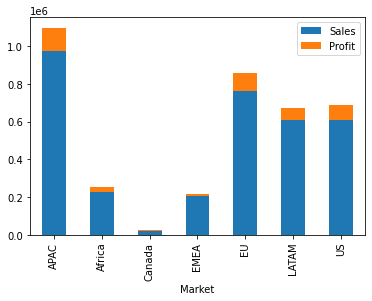

,Sales,Profit
Market,,
APAC,337.22521,42.596237


In [5]:
# #1i.What is the average sales and profit per market?
average_sales_and_profit = df.groupby('Market').agg({'Sales':(np.nanmean),'Profit':(np.nanmean)})

# #ii.Plot a stacked bar chart showing the sales and profit per market.
sales_and_profit = df.groupby('Market').agg({'Sales':(np.sum),'Profit':(np.sum)})
sales_and_profit = sales_and_profit.reset_index()
sales_and_profit.plot(x='Market', y=['Sales','Profit'], kind='bar',stacked =True) 
plt.show()

# iii.Which market brings more sales on the average?
max_sales = average_sales_and_profit['Sales'].max()
average_sales_and_profit[average_sales_and_profit['Sales']==max_sales]


#### APAC brings more sales on the average

# QUESTION 2

In [6]:
# i. What are the best 10 performing products with regards to sales in 2013?
best_10 = df[['Product Name','Sales']]
best_10 = best_10.sort_values('Sales',ascending=False).reset_index()[0:10]#Best 10 performing products


# ii.What are the least 10 performing products with regards to sales 2013?
least_10 = df[['Product Name','Sales']]
least_10 = least_10.sort_values('Sales',ascending=True).reset_index()[0:10]#Least 10 performing products

# QUESTION 3

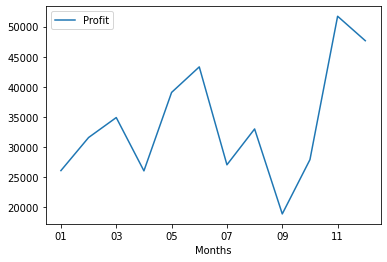

,Days,Sales
1,02,318.411526


In [203]:
# 3i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?
def split_date(row):
    row['Days']=row['Order Date'].split('-')[-1]
    row['Months']=row['Order Date'].split('-')[1]
    return row
df_new = df.apply(split_date,axis = 'columns') #Added the Months and Days columns to the dataframe

# ii.Show the trend of profit from January to December with a line plot.
new_df = df_new.groupby('Months').agg({'Profit':np.sum}).reset_index()
new_df.plot(x="Months", y="Profit")
plt.show()

# iii. Which month does the company make more profit and what 5 products are sold most in that month? 
max_profit = new_df['Profit'].max()
month_max_profit=new_df[new_df['Profit']==max_profit]
new_df2 = df_new.groupby(['Months','Product Name']).agg({'Sales':np.sum}).reset_index()
top_5 = new_df2[new_df2['Months']=='11']
top_5 = top_5.sort_values('Sales',ascending=False).reset_index()[0:5] #Top 5 products sold in November

# iv. which day does the company make high sales on the average?
avg_day = df_new.groupby('Days').agg({'Sales':np.nanmean}).reset_index()
max_avg_sales = avg_day['Sales'].max()
avg_day[avg_day['Sales']==max_avg_sales]

### November is the month the company makes more profit.
### The company makes high average sales on the second (02) day of the month.

<AxesSubplot:xlabel='Sales'>

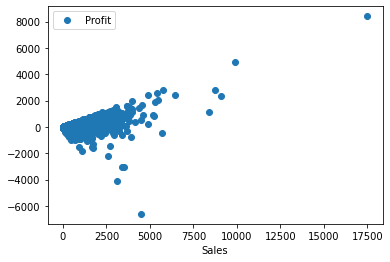

In [219]:
# 4i. By analyzing the data, what is the correlation between sales and discount?
correlation =df['Sales'].corr(df['Discount'])

# ii. Use a scatter plot to show the relationship between sales and profit.
df.plot(x='Sales', y='Profit', style='o')


### Correlation between sales and discount is -0.08470981142655347

In [171]:
# 5i. Plot a grouped bar chart showing the total profit for the different product category for each market.
profit_category = df.groupby(['Market','Category']).agg({'Profit':np.sum}).reset_index()
# profit_category.plot(x='Market', y=['Category','Profit'], kind='bar')

# ii. From your graph, which product category performs well in each market?
#APAC

In [7]:
6#i. Which customer spent the most in the whole year? 
expense_df = df.groupby('Customer Name').agg({'Sales':np.sum,'Product Name':np.sum})
expense_df_max = expense_df['Sales'].max()
expense_df_most = expense_df[expense_df['Sales']==expense_df_max]
expense_df_most

# ii. What product does the customer in (i) buy the most?
expense_df_most['Product Name']

# iii. Which month did the customer spent the most? 
Tamara_df = df[df['Customer Name']=='Tamara Chand']
Tamara_df = Tamara_df.groupby('Months').agg({'Sales':np.sum}).reset_index()
Tamara_month_spend = Tamara_df['Sales'].max()
Tamara_df[Tamara_df['Sales']==Tamara_month_spend] 

# # iv. How much did this customer spend in the whole year?
# Tamara_df['Sales'].sum() 

KeyError: 'Months'

#### Tamara Chand spent the most  in the whole year
#### Tamara Chand most buys Canon imageCLASS 2200 Advanced CopierIbico Ibi
#### Tamara Chand spent the most in the month of March
#### Tamara Chand spent 23190.408 in the whole year